<a href="https://colab.research.google.com/github/leilanorouzi/SpringBoard/blob/master/Capstone_project1/Capstone_Project_1_Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone project 1 - Infential statistics

Data are collected from  [RRVF kaggle](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting) driven from reservation websites. The data set includes two datasets containing date and time of reservation and the number of people from air and hpg data systems. Also, there are some information about the restaurant such as location and the type of the restaurant. 

Two datasets of store information, reservation data and visit data from each air and hpg data systems were merged together to provide a whole data sets for each system. The missing values were deleted. Then both data system were combined using relation information of restaurants to generate our main dataset. However, there was not the related information for some of the entries.

1. The project contains lots of categorical data.  There are the genre of the restaurant, day of the week, the name of the restaurant location, holiday, date, and etc. One approach is the extraction of some information from those categorical data. 
2. There were not the related information for some of the entries. It is not exactly missing data. It is more like there are lots of entries for some resturant whereas only there one entry for others. The number of entries for resturants are not equal.
3. This dataset contains store_id, date and time, genre, location and holiday which are categorical data. There are 517 unique dates, 4947 unique stores, 44 different genres, and 186 different area name.

In here we are going to answer some of following questions:
- Are there variables that are particularly significant in terms of explaining the answer to your project question? 
- Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 




In [0]:
!pip install seaborn -U
!pip install matplotlib -U
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
from google.colab import files
#To get access to the files on google drive an authorization code it nessacery which will be given by the linked below
from google.colab import drive
drive.mount('/gdrive')
#The input directory in the google dirve
input_data_path="/gdrive/My Drive/Colab Notebooks/Capstone_project_1/"


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
df=pd.read_csv(os.path.join(input_data_path,'df0.csv'))

In [66]:
df.head()

,store_id,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude,holiday,time_difference,visit_dayofweek,visit_month,visit_day,visit_hour,visit_date,visit_year,store_id_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1.0,3.0,4,1,1,19,2016-01-01,2016,air_877f79706adbfb06-2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,1.0,0.0,4,1,1,19,2016-01-01,2016,air_db4b38ebe7a7ceff-2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,1.0,0.0,4,1,1,19,2016-01-01,2016,air_db4b38ebe7a7ceff-2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1.0,4.0,4,1,1,20,2016-01-01,2016,air_877f79706adbfb06-2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,1.0,19.0,4,1,1,20,2016-01-01,2016,air_db80363d35f10926-2016-01-01


In [67]:
coff=[0.,0.,0.,0.]
a=list()
for i ,item in enumerate(df.keys()):
    if type(df.loc[0,item])!=str:
        if np.corrcoef(df.iloc[:,i], df['reserve_visitors'])[0, 1]:
            print(i,item,'\t',np.corrcoef(df.iloc[:,i], df['reserve_visitors'])[0, 1])
            a=a+[item]
print(a)

3 reserve_visitors 	 1.0
6 latitude 	 -0.020300385571497877
7 longitude 	 0.03341330098910298
8 holiday 	 -0.03195904343923001
9 time_difference 	 0.24895370400099168
10 visit_dayofweek 	 -0.03444132773154534
11 visit_month 	 0.020025384874401374
12 visit_day 	 0.022526346520660684
13 visit_hour 	 0.0477843545220157
15 visit_year 	 -0.002003066652767533
['reserve_visitors', 'latitude', 'longitude', 'holiday', 'time_difference', 'visit_dayofweek', 'visit_month', 'visit_day', 'visit_hour', 'visit_year']


In [127]:
#b=df[['store_id','store_id_date','holiday']].drop_duplicates('store_id_date', keep='first')
data=df.groupby(['store_id_date']).reserve_visitors.sum().reset_index().join(
    df[['store_id','store_id_date','holiday']].drop_duplicates('store_id_date', keep='first').set_index('store_id_date'),on='store_id_date')
data.head()

,store_id_date,reserve_visitors,store_id,holiday
0,air_00a91d42b08b08d9-2016-10-31,2,air_00a91d42b08b08d9,0.0
1,air_00a91d42b08b08d9-2016-12-05,9,air_00a91d42b08b08d9,0.0
2,air_00a91d42b08b08d9-2016-12-14,18,air_00a91d42b08b08d9,0.0
3,air_00a91d42b08b08d9-2016-12-17,2,air_00a91d42b08b08d9,0.0
4,air_00a91d42b08b08d9-2016-12-20,4,air_00a91d42b08b08d9,0.0


In [128]:
data_holiday=pd.DataFrame({'num_day':data.groupby('holiday').holiday.count(),
              'num_visitor':data.groupby('holiday').reserve_visitors.sum()})
data_holiday['visitory_holiday']=data_holiday.num_visitor/data_holiday.num_day
data_holiday['avg_visitory']=data_holiday['num_visitor']/data_holiday['num_visitor'].sum()
data_holiday

,num_day,num_visitor,visitory_holiday,avg_visitory
holiday,,,,
0.0,549770,4749719,8.639466,0.938168
1.0,38187,313041,8.197580,0.061832


The ratio of visitors in day in holidays and non-holiday is not so different. However, since the number of the working days are 14.4 times more than number of holidays there will be more visitors in non-holidays. 

To test if holiday has impact on visitor numbers, we can set up 

1. a chi-square test as:
  - Null hypothesis: number of visitors depends on holidays
  - Alternative hypothesis: number of visitors does not depend on the type od day (being holiday or not)

2. a bootstrap hypothesis test as :
  - Null hypotesis: $H_o: \mu_{holiday}-\mu_{non-holiday}=0$
  - Alternative hyppothesis: $H_a: \mu_{holiday}-\mu_{non-holiday}\neq0$
  
### Chi-square test:

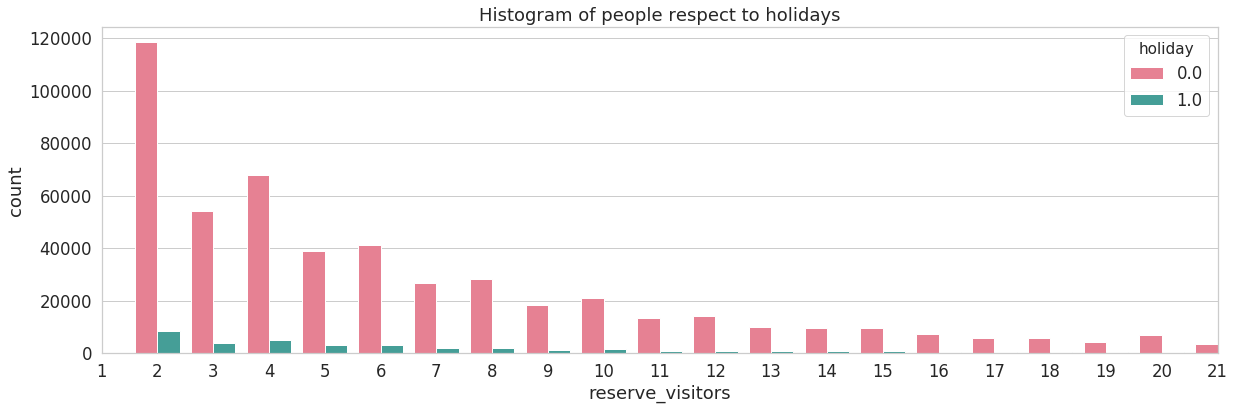

In [129]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,6))
sns.countplot(data=data,x='reserve_visitors',hue='holiday',palette='husl')
plt.title('Histogram of people respect to holidays')
plt.xlim([0,20])
plt.show()
plt.close(fig)

In [130]:
# Directly using statsmodel (chi-squared)
from statsmodels.stats.proportion import proportions_chisquare
stat, p_val, tbl = proportions_chisquare([data_holiday.loc[0,'num_visitor'], data_holiday.loc[1,'num_visitor']], [data_holiday.num_day[0],data_holiday.num_day[1]])
print('\nFrom Chi-square test:\nZ-Score={0:0.3f} \nP-Value={1:0.3f}'.format(stat, p_val))


From Chi-square test:
Z-Score=-106.390 
P-Value=1.000


Since the P-value  is larger than the significance level (0.05), we  accept the null hypothesis. Thus, we conclude that there is no relationship between holiday and the number of visitors.

### Bootstraping test:

In [131]:
h = data[data.holiday==1.0]
d = data[data.holiday==0]

#defining bootstrap sampling function
def bs_sampling(data,size=10000):
  np.random.seed(10)
  #data:input data
  #size: size of sampling
  s=np.empty(size)
  for i in range(size): s[i]=np.sum(np.random.choice(data, size))/size
  return s

#creating bootsatrap samples
bs_h_visitors= bs_sampling(h.reserve_visitors)
bs_d_visitors= bs_sampling(d.reserve_visitors)

bs_diff= bs_h_visitors-bs_d_visitors
p_diff = (np.sum(h.reserve_visitors)-np.sum(d.reserve_visitors))/len(h.reserve_visitors)

bs_p_value=np.sum(bs_diff<=abs(p_diff))/len(bs_diff)
bs_conf_int= np.percentile(bs_diff, [2.5, 97.5])
bs_mu= np.mean(bs_diff) #mean of bootstraped sample
bs_me=bs_conf_int-bs_mu


print('Bootstraping test p-value:',bs_p_value)
print('Bootstraping confidence level: ',bs_conf_int)
print('Bootstrapping margin of error:',bs_me)


Bootstraping test p-value: 1.0
Bootstraping confidence level:  [-0.7369025 -0.161495 ]
Bootstrapping margin of error: [-0.29432683  0.28108067]


Since the bootstrap test p-value is less than significant level, hence we can accept the null hypotesis. The holiday has not impact on visitor numbers. 